<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

# Import Libraries


*   `pandas` for data manipulation.
*   `numpy` for mathematics.
*   `matplotlib.pyplot` and `seaborn`  for data visualization.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# File Path


In [4]:
train = pd.read_csv(FILE_PATH + "Train.csv")
test = pd.read_csv(FILE_PATH + "Test.csv")
sub = pd.read_csv(FILE_PATH + 'SampleSubmission.csv')

## Load Data

Load data to DataFrame

In [6]:
print(train.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
all_data = pd.concat((train,test)).reset_index(drop=True)

In [8]:
all_data = train.copy()

In [9]:
all_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [10]:
all_data.duplicated().sum()

0

In [11]:
all_data.isnull().sum()/ len(all_data)

,0
ID,0.000000
country,0.000000
age_group,0.000000
travel_with,0.231649
total_female,0.000624
total_male,0.001040
purpose,0.000000
main_activity,0.000000
info_source,0.000000
tour_arrangement,0.000000


In [12]:
country = all_data['country'].value_counts()

In [13]:
all_data['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [14]:
africa = ['SOUTH AFRICA','NIGERIA','MOZAMBIQUE', 'RWANDA','KENYA', 'ALGERIA','EGYPT','MALAWI',
          'UGANDA','ZIMBABWE', 'ZAMBIA', 'CONGO','MAURITIUS', 'DRC','SWAZILAND', 'TUNISIA',
          'ETHIOPIA','BURUNDI','GHANA', 'NIGER','ANGOLA','CAPE VERDE', 'SUDAN','NAMIBIA',
          'LESOTHO','IVORY COAST', 'MADAGASCAR', 'DJIBOUT','MORROCO','BOTSWANA','LIBERIA',
          'GUINEA', 'SOMALI','COMORO',
          ]
is_african = []

for country in all_data['country']:
    if country in africa:
        is_african.append(True)
    else:
        is_african.append(False)

all_data['is_african'] = is_african


In [15]:
all_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [16]:
all_data['is_african'].value_counts()

,count
is_african,
False,3494
True,1315


In [17]:
all_data.describe(include=['O'])

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
count,4809,4809,4809,3695,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4496
unique,4809,105,4,5,7,9,8,2,2,2,2,2,2,2,2,4,2,7
top,tour_0,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,Friendly People
freq,1,695,2487,1265,2840,2259,1913,2570,3357,2602,2748,2919,3319,3259,4079,4172,3243,1541


In [18]:
#drop ID column
all_data.drop(columns= ['ID'],inplace=True)

In [19]:
for i in all_data.describe(include=['O']):
    print(i)
    print('---'*10)
    print(all_data[i].value_counts())

country
------------------------------
country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64
age_group
------------------------------
age_group
25-44    2487
45-64    1391
1-24      624
65+       307
Name: count, dtype: int64
travel_with
------------------------------
travel_with
Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: count, dtype: int64
purpose
------------------------------
purpose
Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volun

In [20]:

#converting our TZS into dollars
all_data['total_cost'] = all_data['total_cost']
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,is_african
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,False
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,False
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,False
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,False
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,False


In [21]:
#groupby function
#Assessing country
country_avg_spending  = pd.DataFrame(all_data.groupby(['country'])['total_cost'].mean().sort_values(ascending=False))

In [22]:
country_avg_spending.head(10)

,total_cost
country,
DOMINICA,3.315000e+07
COSTARICA,2.718300e+07
SLOVENIA,1.906237e+07
TUNISIA,1.574625e+07
AUSTRALIA,1.474802e+07
DENMARK,1.456879e+07
ISRAEL,1.430542e+07
RUSSIA,1.358321e+07
COLOMBIA,1.331525e+07


In [23]:
#age_group by total_cost
age_avg_spending  = pd.DataFrame(all_data.groupby(['age_group'])['total_cost'].mean().sort_values(ascending=False))
age_avg_spending.head()

,total_cost
age_group,
65+,1.721195e+07
45-64,1.105093e+07
25-44,6.026176e+06
1-24,5.415205e+06


In [24]:
# age group and country
#age_group by total_cost
age_country_avg_spending  = pd.DataFrame(all_data.groupby(['country','age_group'])['total_cost'].mean().sort_values(ascending=False))
age_country_avg_spending.head(10)

,,total_cost
country,age_group,
SWEDEN,65+,5.221125e+07
NEW ZEALAND,65+,3.729375e+07
DOMINICA,65+,3.315000e+07
ISRAEL,45-64,3.163753e+07
QATAR,25-44,2.970630e+07
AUSTRALIA,65+,2.730855e+07
COSTARICA,25-44,2.718300e+07
DENMARK,65+,2.622609e+07
MEXICO,45-64,2.502825e+07


In [25]:
#age_group by total_cost
travel_avg_spending  = pd.DataFrame(all_data.groupby(['travel_with'])['total_cost'].mean().sort_values(ascending=False))
travel_avg_spending.head()

,total_cost
travel_with,
Spouse and Children,1.833085e+07
Spouse,1.268289e+07
Friends/Relatives,1.023318e+07
Children,1.020680e+07
Alone,3.426150e+06


<Axes: xlabel='total_cost', ylabel='Density'>

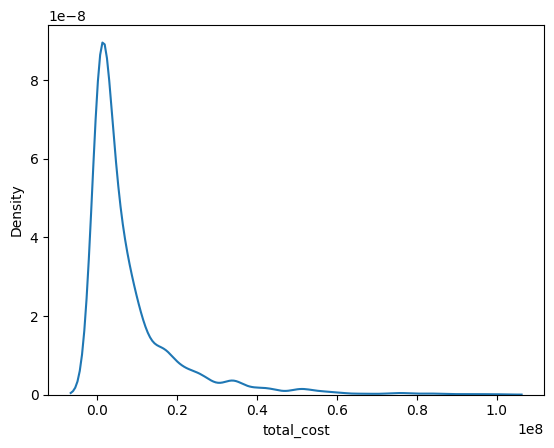

In [26]:
sns.kdeplot(all_data['total_cost'])

In [27]:
#age_group by total_cost
purpose_avg_spending  = pd.DataFrame(all_data.groupby(['purpose'])['total_cost'].mean().sort_values(ascending=False))
purpose_avg_spending.head(10)

,total_cost
purpose,
Leisure and Holidays,1.195114e+07
Scientific and Academic,4.031990e+06
Volunteering,3.950565e+06
Visiting Friends and Relatives,3.190776e+06
Meetings and Conference,2.453004e+06
Business,1.782438e+06
Other,1.592155e+06


In [28]:
#age_group by total_cost
ma_avg_spending  = pd.DataFrame(all_data.groupby(['main_activity'])['total_cost'].mean().sort_values(ascending=False))
ma_avg_spending.head(10)

,total_cost
main_activity,
Diving and Sport Fishing,1.709434e+07
Wildlife tourism,1.059533e+07
Conference tourism,1.030680e+07
business,8.125078e+06
Beach tourism,7.524837e+06
Bird watching,4.216563e+06
Cultural tourism,3.991139e+06
Hunting tourism,1.911327e+06
Mountain climbing,1.862857e+06


In [29]:
#age_group by total_cost
info_avg_spending  = pd.DataFrame(all_data.groupby(['info_source'])['total_cost'].mean().sort_values(ascending=False))
info_avg_spending.head(10)

,total_cost
info_source,
"Travel, agent, tour operator",1.312327e+07
Trade fair,6.751698e+06
"Newspaper, magazines,brochures",6.386334e+06
"Radio, TV, Web",6.351531e+06
others,4.524773e+06
"Friends, relatives",4.310349e+06
Tanzania Mission Abroad,3.142777e+06
inflight magazines,2.494671e+06


In [30]:
#age_group by total_cost
ta_avg_spending  = pd.DataFrame(all_data.groupby(['tour_arrangement'])['total_cost'].mean().sort_values(ascending=False))
ta_avg_spending.head(10)

,total_cost
tour_arrangement,
Package Tour,1.425958e+07
Independent,2.760664e+06


In [31]:
#age_group by total_cost
pm_avg_spending  = pd.DataFrame(all_data.groupby(['payment_mode'])['total_cost'].mean().sort_values(ascending=False))
pm_avg_spending.head(10)

,total_cost
payment_mode,
Travellers Cheque,1.820063e+07
Credit Card,1.127746e+07
Cash,7.632609e+06
Other,4.608355e+06


In [32]:
#age_group by total_cost
ftz_avg_spending  = pd.DataFrame(all_data.groupby(['first_trip_tz'])['total_cost'].mean().sort_values(ascending=False))
ftz_avg_spending.head(10)

,total_cost
first_trip_tz,
Yes,1.008298e+07
No,4.037669e+06


In [33]:
#age_group by total_cost
mi_avg_spending  = pd.DataFrame(all_data.groupby(['most_impressing'])['total_cost'].mean().sort_values(ascending=False))
mi_avg_spending.head(10)

,total_cost
most_impressing,
Wildlife,1.091794e+07
Friendly People,8.230207e+06
Good service,7.970768e+06
"Wonderful Country, Landscape, Nature",7.851652e+06
Excellent Experience,7.430729e+06
No comments,6.627722e+06
Satisfies and Hope Come Back,5.661282e+06


In [34]:
#age_group by total_cost
ia_avg_spending  = pd.DataFrame(all_data.groupby(['is_african'])['total_cost'].mean().sort_values(ascending=False))
ia_avg_spending.head(10)

,total_cost
is_african,
False,1.001370e+07
True,3.067858e+06


In [35]:
# replace null values with 0
# combining both our train and test dataset to have one that we can clean both datasets
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [36]:
# Handling the missing values by filling 'None' throughout all instances
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
# Handling the missing values by filling through the mean value of the entire column
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [37]:
africa = ['SOUTH AFRICA','NIGERIA','MOZAMBIQUE', 'RWANDA','KENYA', 'ALGERIA','EGYPT','MALAWI',
          'UGANDA','ZIMBABWE', 'ZAMBIA', 'CONGO','MAURITIUS', 'DRC','SWAZILAND', 'TUNISIA',
          'ETHIOPIA','BURUNDI','GHANA', 'NIGER','ANGOLA','CAPE VERDE', 'SUDAN','NAMIBIA',
          'LESOTHO','IVORY COAST', 'MADAGASCAR', 'DJIBOUT','MORROCO','BOTSWANA','LIBERIA',
          'GUINEA', 'SOMALI','COMORO',
          ]
is_african = []

for country in data['country']:
    if country in africa:
        is_african.append(True)
    else:
        is_african.append(False)

data['is_african'] = is_african

In [38]:
peak_period = []

for row in data.purpose:
    if row == 'Leisure and Holidays':
        peak_period.append(True)
    else:
        peak_period.append(False)

data['peak_period'] = peak_period

In [39]:
old_folks = []

for row in data.age_group:
    if row == '65+':
        old_folks.append(True)
    else :
        old_folks.append(False)

data['old_folks'] = old_folks

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])
data['peak_period'] = le.fit_transform(data['peak_period'])
data['is_african'] = le.fit_transform(data['is_african'])
data['old_folks'] = le.fit_transform(data['old_folks'])

In [41]:
columns_to_transform = ['tour_arrangement',
                        'travel_with',
                        'purpose',
                        'main_activity',
                        'info_source',
                        'most_impressing',
                        'payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [42]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [43]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [44]:
print(train_df.shape)
print(test_df.shape)

(4809, 56)
(1601, 56)


In [45]:
#Modelling
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]
trans_target = target.apply(np.log10)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score